In [2]:
# You may add additional imports here
import random
import matplotlib.pyplot as plt
import csv

Question 1
==========

All parts of Question 1 use the _point-a-rally (PARS) scoring_ system.

**Question 1a:** Complete the following function so that it implements the PARS algorithm from the coursework specification.

**[Functionality: 7 marks]**

In [3]:
def game(ra, rb):
    a_wins = 0
    b_wins = 0
    choices = ["a", "b"]
    prob_a = ra / (ra + rb)
    prob_b = 1 - prob_a
    while (a_wins < 11 and b_wins < 11) or ((a_wins - 2) <= b_wins and (b_wins - 2) <= a_wins):
        winner = random.choices(choices, weights = (prob_a, prob_b))
        if winner == ['a']:
            a_wins += 1
        elif winner == ['b']:
            b_wins += 1
    return a_wins, b_wins


**Testing:** If the random seed is set to 57, then calling the function with arguments `70` and `30` should return `(11,5)`.

In [4]:
random.seed(57)
print(game(70,30))

(11, 5)


**Question 1b:** Complete the following function `win_probability_game(ra, rb, simulations)` to simulate `simulations` games in order to estimate the probability that a player with ability `ra` will win a game against a player of ability `rb`.

**[Functionality: 4 marks]**

In [5]:
def win_probability_game(ra, rb, simulations):
    a_wins = 0
    b_wins = 0
    for i in range(simulations - 1):
        score = game(ra, rb)
        if score[0] > score[1]:
            a_wins += 1
        else:
            b_wins += 1
    total_wins = a_wins + b_wins
    prob_a = a_wins / total_wins
    return prob_a


**Testing:** Given sufficient simulations, calling the function with abilities `70` and `30` should give the answer `0.98` when printed to 2 decimal places.

In [6]:
# Print win_probability_game(70, 30, print(round(winProbability(70, 30), 2))) to 2 decimal places for a suitable value of n
print(round(win_probability_game(70,30,20000),2))

0.98


**Question 1c:** Assume players abilities are given in a csv file with the format:
```
player a ability, player b ability,
60, 20,
100, 55,
50, 40,
20, 70,
95, 85,
```
Complete the following function to read in a specified csv file of this format and return a `list` of `tuple`s containing each pair of abilities.

**[Functionality: 4 marks]**

In [7]:
def read_abilities(abilities): # HINT: what should the argument be?
    with open(abilities) as csvfile:
        file = csv.reader(csvfile)
        next(file, None)
        pairs = []
        for row in file:
            pairs.append((int(row[0]), int(row[1])))
        return pairs

**Testing:** Calling the function to read the file `test.csv` from Learning Central should return `[(60, 20), (100, 55), (50, 40), (20, 70), (95, 85)]`

In [8]:
print(read_abilities('test.csv'))

[(60, 20), (100, 55), (50, 40), (20, 70), (95, 85)]


**Question 1d:** Write a function that takes a `list` of the format returned by your answer to 1c as an argument, and uses `matplotlib` to produce a plot (with labelled axes) showing the probability that player a beats player b (in a game) against `ra / r_b` for each pair.

**[Functionality: 5 marks]**

In [9]:
def plot_win_probabilities(abilities): 
    probs_a = []
    rarb = []
    # HINT: what should the argument be?
    for ability in abilities:
        probs_a.append(win_probability_game(ability[0], ability[1], 20000))
        rarb.append(ability[0]/ability[1])
    plt.plot(rarb, probs_a, 'bo')
    plt.xlabel('ra / rb')
    plt.ylabel('Probability A wins')
    plt.show()


**Testing:** The following figure (or similar) should result from the data `[(60, 20), (100, 55), (50, 40), (20, 70), (95, 85)]'

<img src="./win_probabilities.png" alt="Win probabilities" width="500">


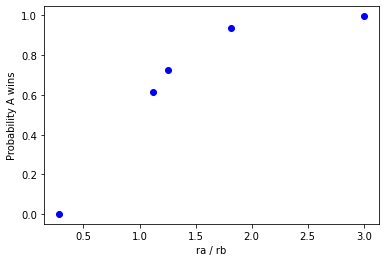

In [10]:
plot_win_probabilities(read_abilities('test.csv'))

**Question 1e:** Complete the following function `win_probability_match(ra, rb, simulations, m)` to simulate `simulations` matches which are won by the first player to win `m` games, and returns an estimate of the probability that a player with ability `ra` will win such a match against a player of ability `rb`.

Provide code that works out the smallest value of `m` such that `win_probability_match(60, 40, simulations, m)` is at least `0.9`. 

_HINT: make sure you use an appropriate value for `simulations`._

**[Functionality: 5 marks]**

In [11]:
def match(ra, rb, m):
    a_wins = 0
    b_wins = 0
    while b_wins < m and a_wins < m:
        one_game = game(ra, rb)
        if one_game[0] > one_game[1]:
            a_wins += 1
        else:
            b_wins += 1
    return a_wins, b_wins

def win_probability_match(ra, rb, simulations, m):
    a_wins = 0
    b_wins = 0
    for simulation in range(1, simulations):
        one_match = match(ra, rb, m)
        if one_match[0] > one_match[1]:
            a_wins += 1
        else:
            b_wins += 1
    total_matches = a_wins + b_wins
    prob_a = a_wins / total_matches
    return prob_a

def min_m():
    m = 0
    while win_probability_match(60,40,2000,m) < 0.9:
        m += 1
    return m

min_m()

2

Question 2
==========

Complete the remaining template of a scientific report that uses the results of simulation (with suitable input data) to investigate whether English or PARS is the ``better'' scoring method for squash matches. 

You should clearly state any assumptions you make, and may add any number of code cells. Guidance for completing the markdown/text cells is given in the coursework specification. The word count of the remaining markdown/text cells must be at most 750.

Your investigation should consider the relative ability of the two players (i.e. `ra/rb`) as the _independent variable_ and include appropriate figures that show how your choice of relevant _dependent variable_ varies. Your results **must** cover at least 50 different values of `ra/rb`.

Some starting points you may consider:
- How _fair_ is the scoring method - does the better player usually win?
- Shorter matches are usually preferable (e.g. for television) - if you assume each rally in a match takes equal time, how long do matches typically last?
- What effect does the relative ability of the two players have?

**[Report: 7 marks; Achievement: 8 marks]**

## Problem

In my investigation, I will be comparing the probabilities of a given player winning a match in both scoring systems as well as the average number of rallies required for a player to win a match. The scoring method with the highest probability that the player with the highest ability will win and which results in the shortest match (the least rallies) is defined as the "better" scoring method. 

## Method

I will be simulating 2000 'best of five' matches each for 50 sets of two players with randomised abilities, for each scoring method. I will then calculate the probability that a given player will win a match. I will represent this data graphically, with ra / rb (x axis) plotted against the probability that a will win (y axis) for each scoring method which can then be compared. I will then calculate the average number of rallies for a match for both scoring methods and represent this graphically, with ra / rb (x axis) plotted against the time taken for a match in minutes (y axis). These can be compared to find which scoring method gives the shortest match. 

In [12]:
player_sets = [(random.randrange(1,101), random.randrange(1,101)) for i in range(50)]

def english_game(ra, rb):
    a_wins = 0
    b_wins = 0
    choices = ["a", "b"]
    prob_a = ra / (ra + rb)
    prob_b = 1 - prob_a
    score_to_win = 9
    decision = random.randint(0, 1)
    chosen = False
    returns = 0
    if decision == 1:
        server = ['a']
        returner = ['b']
    else:
        server = ['b']
        returner = ['a']
    while a_wins < score_to_win and b_wins < score_to_win:
        winner = random.choices(choices, weights = (prob_a, prob_b))
        if winner == ['a'] and winner == server:
            a_wins += 1
        elif winner == ['b'] and winner == server:
             b_wins += 1
        elif winner == returner:
            temp = returner
            returner = server
            server = temp
            returns += 1
        if a_wins == 8 and b_wins == 8 and chosen == False:
            score_to_win = random.randint(9,10)
            chosen = True
    return a_wins, b_wins, returns

def english_match(ra, rb, m):
    a_wins = 0
    b_wins = 0
    while b_wins < m and a_wins < m:
        one_game = english_game(ra, rb)
        if one_game[0] > one_game[1]:
            a_wins += 1
        else:
            b_wins += 1
    return a_wins, b_wins

def win_probability_english_match(ra, rb, simulations, m):
    a_wins = 0
    b_wins = 0
    for simulation in range(1, simulations):
        one_match = english_match(ra, rb, m)
        if one_match[0] > one_match[1]:
            a_wins += 1
        else:
            b_wins += 1
    total_matches = a_wins + b_wins
    prob_a = a_wins / total_matches
    return prob_a

In [13]:
def eng_match_prob_plot():
    match_probs = []
    for player_set in player_sets:
        match_probs.append(win_probability_english_match(player_set[0], player_set[1], 2000, 3))
    return match_probs

def pars_match_prob_plot():
    match_probs = []
    for player_set in player_sets:
        match_probs.append(win_probability_match(player_set[0], player_set[1], 2000, 3))
    return match_probs

def plot_prob_graph(player_sets):
    rarb = []
    for player_set in player_sets:
        rarb.append(player_set[0] / player_set[1])
        
    plt.plot(rarb, eng_match_prob_plot(), 'bo')
    plt.plot(rarb, pars_match_prob_plot(), 'ro')
    plt.title('Probability A wins vs. ra / rb')
    plt.axis([0,2,0,1])
    plt.xlabel('ra / rb')
    plt.ylabel('Probability A wins')
    plt.legend(['English Method', 'PARS Method'], loc = "lower right")
    plt.show()

In [14]:
def rallies_eng_game(ra, rb): 
    one_game = english_game(ra, rb)
    rallies = one_game[0] + one_game[1] + one_game[2]
    if one_game[0] > one_game[1]:
        winner = "a"
    else:
        winner = "b"
    return rallies, winner

def rallies_eng_match(ra, rb, m):
    a_wins = 0
    b_wins = 0
    total_rallies = 0
    while a_wins < m and b_wins < m:
        rally = rallies_eng_game(ra, rb)
        total_rallies += rally[0]
        if rally[1] == "a":
            a_wins += 1
        else:
            b_wins += 1
    return total_rallies

def time_eng_match(ra, rb, m, simulations): #assuming one rally lasts for one minute
    total_time = 0
    for i in range(1, simulations):
        total_time += rallies_eng_match(ra, rb, m)
    time = total_time / simulations
    return time

def rallies_pars_game(ra, rb): 
    one_game = game(ra, rb)
    rallies = one_game[0] + one_game[1]
    if one_game[0] > one_game[1]:
        winner = "a"
    else:
        winner = "b"
    return rallies, winner

def rallies_pars_match(ra, rb, m):
    a_wins = 0
    b_wins = 0
    total_rallies = 0
    while a_wins < m and b_wins < m:
        rally = rallies_pars_game(ra, rb)
        total_rallies += rally[0]
        if rally[1] == "a":
            a_wins += 1
        else:
            b_wins += 1
    return total_rallies

def time_pars_match(ra, rb, m, simulations): #assuming one rally lasts for one minute
    total_time = 0
    for i in range(1, simulations):
        total_time += rallies_pars_match(ra, rb, m)
    time = total_time / simulations
    return time

print(time_eng_match(50, 50, 3, 2000))
print(time_pars_match(50, 50, 3, 2000))

114.4115
84.8105


In [15]:
def eng_match_time_plot():
    match_times = []
    for player_set in player_sets:
        match_times.append(time_eng_match(player_set[0], player_set[1], 3, 2000))
    return match_times

def pars_match_time_plot():
    match_times = []
    for player_set in player_sets:
        match_times.append(time_pars_match(player_set[0], player_set[1], 3, 2000))
    return match_times

def plot_time_graph(player_sets):
    rarb = []
    for player_set in player_sets:
        rarb.append(player_set[0] / player_set[1])
        
    plt.plot(rarb, eng_match_time_plot(), 'bo')
    plt.plot(rarb, pars_match_time_plot(), 'ro')
    plt.title('Average time for a match vs. ra / rb')
    plt.axis([0,2,0,120])
    plt.xlabel('ra / rb')
    plt.ylabel('Time taken for a match (min)')
    plt.legend(['English Method', 'PARS Method'], loc = "lower right")
    plt.show()

## Assumptions

1) Player's ability can be represented by an integer between 1 and 100
2) Player's ability never changes throughout the game
3) In the English scoring method, if the score reaches 8:8 the player who decides whether they play to 9 or 10 has a 50/50 chance to choose either 9 or 10
4) One rally lasts for one minute
5) Being either a server or a returner doesn't affect the probability that either will win a point

## Results

Using the helper functions from my method, I have plotted a graph of the probability of the given player A winning against ra / rb for both scoring methods. I have also plotted a graph of the average time for one match against ra / rb for both scoring methods. 

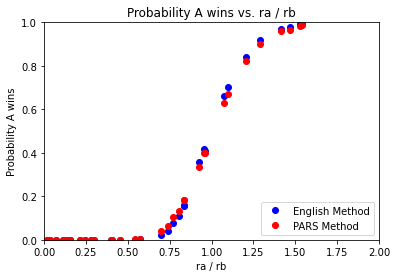

In [16]:
plot_prob_graph(player_sets)

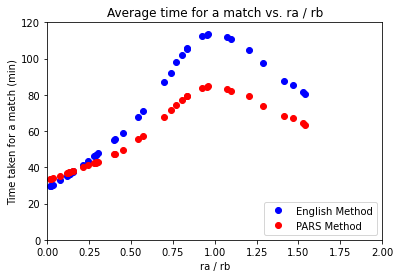

In [17]:
plot_time_graph(player_sets)

## Conclusions

The 'Probability A wins vs. ra/rb' graph shows a positive correlation for both scoring methods. There are no significant differences in the graphs shown for both scoring methods. From this I can conclude that it is no more likely for the better player to win using either scoring method. The 'Average time for a match vs. ra/rb' graph shows that as ra/rb increases up to 1, the time taken for a match increases and then decreases as ra/rb increases past this point. After ra/rb reaches 0.25, the average time for an average match is always lower for the PARS method than the English method. At the peak at 1 ra/rb, the time taken for a match using the English method is 114.4 minutes, whereas using the PARS method it is 84.8 minutes (both rounded to 1 decimal place). From this, I can conclude that using the PARS method usually results in a shorter match, which is preferred for professional matches. Therefore, the PARS scoring method is the better scoring method.